# Imports

In [7]:
import Thymio as th
import time
import numpy as np
import matplotlib.pyplot as plt

## Test pour avancer tout droit

In [2]:
### Setting up the origin and the kalman filter
current_pos = np.array([0,0,0])
current_speed = np.array([0,0,0])
z_predicted = np.concatenate([current_pos,current_speed]) #kalman_state
sigma_predicted = np.diag([0,0,0,0,0,0])

### Goal pos
goal_pos = np.array([100,0])


print("Open thymio")
thymio = th.Thymio()
await thymio.initiateLock()
print("Thymio opened")

Open thymio
Thymio opened


### Autre solution

In [ ]:
### Data storage for plotting
xdata, ydata, thetadata, Vleftdata, Vrightdata = [], [], [], [], []
iteration_times = []
vars_towait = ['prox.horizontal','motor.right.speed','motor.left.speed','motor.right.target','motor.right.target']
    
while True:
    start_time = time.time()  # Capture start time
    thymio.wait_for_variables(vars_towait)

    if thymio.robot_close_waypoint(current_pos[:2], goal_pos[0], goal_pos[1]):
        print("Goal reached")
        thymio.set_multiple_variables({"motor.left.target":[0],"motor.right.target":[0]})
        break
    
    
    Vleft = thymio.getSpeedL()
    Vright = thymio.getSpeedR()

    thymio.navigate(current_pos, goal_pos)
    current_pos = z_predicted[:3] # Is used for the controller

    xdata.append(current_pos[0])
    ydata.append(current_pos[1])
    thetadata.append(current_pos[2])
    Vleftdata.append(Vleft)
    Vrightdata.append(Vright)

    z_filtered, sigma_filtered= thymio.filtering_step(z_k_k_1 = z_predicted, 
                                    sigma_k_k_1 = sigma_predicted, 
                                    V_left_measure = Vleft, 
                                    V_right_measure = Vright, 
                                    camera_working=False)
    
    z_predicted, sigma_predicted = thymio.prediction_step(z_filtered, sigma_filtered)

    obstacle,detected = thymio.getObstaclePosition()
    if detected:
        print("Obstacle detected")
        
    

    end_time = time.time()  # Capture end time
    iteration_time = end_time - start_time  # Compute iteration time
    iteration_times.append(iteration_time)  # Store iteration time
    print(f"Iteration time: {iteration_time:.6f} seconds")  # Print iteration time


Is the goal reached ?
False
{'motor.left.target': [151], 'motor.right.target': [151]}
Iteration time: 0.614636 seconds
Is the goal reached ?
False
{'motor.left.target': [151], 'motor.right.target': [151]}
Iteration time: 0.307101 seconds
Is the goal reached ?
False
{'motor.left.target': [151], 'motor.right.target': [151]}
Iteration time: 0.305832 seconds
Is the goal reached ?
False
{'motor.left.target': [151], 'motor.right.target': [151]}
Iteration time: 0.302871 seconds
Is the goal reached ?
False
{'motor.left.target': [127], 'motor.right.target': [127]}
Iteration time: 0.302781 seconds
Is the goal reached ?
False
{'motor.left.target': [91], 'motor.right.target': [91]}
Iteration time: 0.306022 seconds
Is the goal reached ?
True
Goal reached
{'motor.left.target': [0], 'motor.right.target': [0]}


In [6]:
thymio.set_multiple_variables({"motor.left.target":[0],"motor.right.target":[0]})

{'motor.left.target': [0], 'motor.right.target': [0]}


In [5]:
print(f'Première estimation Ts = {np.mean(np.array(iteration_times))}')

Première estimation Ts = 0.3565405209859212


#### Deuxième contrôle

In [9]:
### Setting up the origin and the kalman filter
current_pos = np.array([0,0,0])
current_speed = np.array([0,0,0])
z_predicted = np.concatenate([current_pos,current_speed]) #kalman_state
sigma_predicted = np.diag([0,0,0,0,0,0])

### Goal pos
path = [(length,0) for length in range(0,1700,100)]


print("Open thymio")
thymio = th.Thymio()
await thymio.initiateLock()
print("Thymio opened")

Open thymio
Thymio opened


In [10]:
### Data storage for plotting
xdata, ydata, thetadata, Vleftdata, Vrightdata = [], [], [], [], []
iteration_times = []
vars_towait = ['prox.horizontal','motor.right.speed','motor.left.speed','motor.right.target','motor.right.target']
    
while True:
    start_time = time.time()  # Capture start time
    thymio.wait_for_variables(vars_towait)
    next_goal = path[0]
    
    print(f'Next goal : {next_goal}')
    print(f'Current position : {current_pos}')

    if thymio.robot_close_waypoint(current_pos[:2], next_goal[0], next_goal[1]):
        path.pop(0)
        if len(path) == 0:
            print("Goal reached")
            break
        
    Vleft = thymio.getSpeedL()
    Vright = thymio.getSpeedR()

    print(f'Speeds : {Vleft,Vright}')

    thymio.navigate(current_pos, next_goal)
    current_pos = z_predicted[:3] # Is used for the controller
    
    xdata.append(current_pos[0])
    ydata.append(current_pos[1])
    thetadata.append(current_pos[2])
    Vleftdata.append(Vleft)
    Vrightdata.append(Vright)

    z_filtered, sigma_filtered= thymio.filtering_step(z_k_k_1 = z_predicted, 
                                    sigma_k_k_1 = sigma_predicted, 
                                    V_left_measure = Vleft, 
                                    V_right_measure = Vright, 
                                    camera_working=False)
    
    z_predicted, sigma_predicted = thymio.prediction_step(z_filtered, sigma_filtered)

    obstacle,detected = thymio.getObstaclePosition()
    if detected:
        print("Obstacle detected")
    
    end_time = time.time()  # Capture end time
    iteration_time = end_time - start_time  # Compute iteration time
    iteration_times.append(iteration_time)  # Store iteration time
    print(f"Iteration time: {iteration_time:.6f} seconds")  # Print iteration time
    
        

Next goal : (0, 0)
Current position : [0 0 0]
Is the goal reached ?
True
Speeds : (0.0, 0.0)
{'motor.left.target': [0], 'motor.right.target': [0]}
Iteration time: 0.613270 seconds
Next goal : (100, 0)
Current position : [0 0 0]
Is the goal reached ?
False
Speeds : (0.0, 0.0)
{'motor.left.target': [82], 'motor.right.target': [82]}
Iteration time: 0.304320 seconds
Next goal : (100, 0)
Current position : [0. 0. 0.]
Is the goal reached ?
False
Speeds : (19.147896, 0.0)
{'motor.left.target': [82], 'motor.right.target': [82]}
Iteration time: 0.304647 seconds
Next goal : (100, 0)
Current position : [0. 0. 0.]
Is the goal reached ?
False
Speeds : (59.039346, 57.443688)
{'motor.left.target': [82], 'motor.right.target': [82]}
Iteration time: 0.303012 seconds
Next goal : (100, 0)
Current position : [2.91048019 0.         0.07782031]
Is the goal reached ?
False
Speeds : (65.421978, 63.028491)
{'motor.left.target': [79], 'motor.right.target': [79]}
Iteration time: 0.303392 seconds
Next goal : (100,

KeyboardInterrupt: 

In [11]:
thymio.set_multiple_variables({"motor.left.target":[0],"motor.right.target":[0]})

{'motor.left.target': [0], 'motor.right.target': [0]}


##### Affichage position

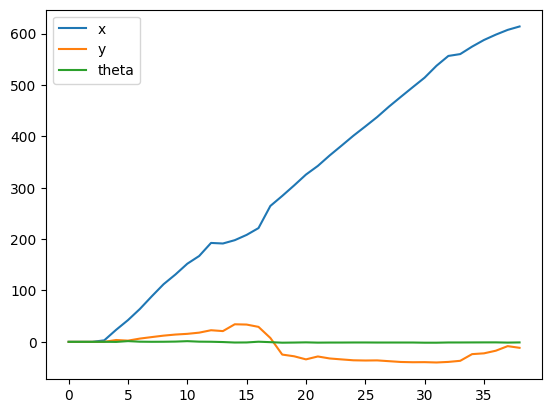

In [12]:
plt.plot(xdata, label='x')
plt.plot(ydata, label='y')
plt.plot(thetadata, label='theta')
plt.legend()

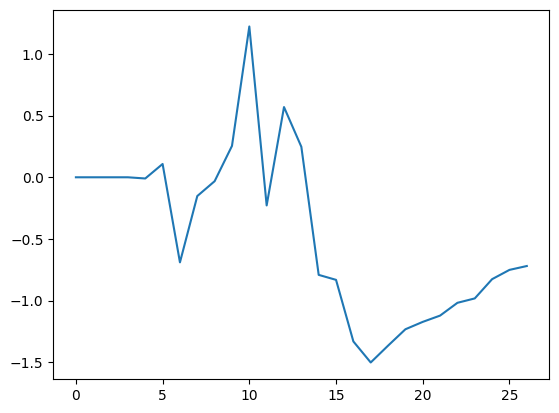

In [6]:
plt.plot(thetadata)

In [6]:
xdata

[0,
 0.0,
 0.0,
 0.0,
 5.394983277591974,
 11.17333140211311,
 17.25321310498984,
 23.281991879590898,
 28.982245174600568,
 34.43450124187444,
 39.494000196396414,
 44.9255391646128,
 49.71678516993186,
 53.682274557569386,
 57.11149718283747,
 60.5434925441462,
 63.489450730930756,
 66.27605600796447,
 74.00631022765283,
 81.47906113891034,
 90.57713931594766,
 98.85992862862696,
 106.43416456099078,
 113.71728461646435,
 120.2740164820846,
 126.68115769012559,
 133.10750787677833,
 139.46807784260645,
 145.87741940055324,
 151.28628701710858,
 155.99563274316654,
 161.1962181851604,
 166.55485683627728,
 171.92075312608884,
 173.851951046803,
 193.83556009746323,
 200.97050252105012,
 209.29331842053597,
 217.56016414312938,
 224.72414491781365,
 232.51182721267952,
 240.88298491263876,
 248.7164520534334,
 256.170855632498,
 263.4803631033473,
 270.69425852049807,
 277.96661746321814,
 285.1821425393087,
 292.3792297978892,
 299.8214648547325,
 307.046471446039,
 314.21368754797334

##### Vérification du fait que le robot atteigne bien sa cible

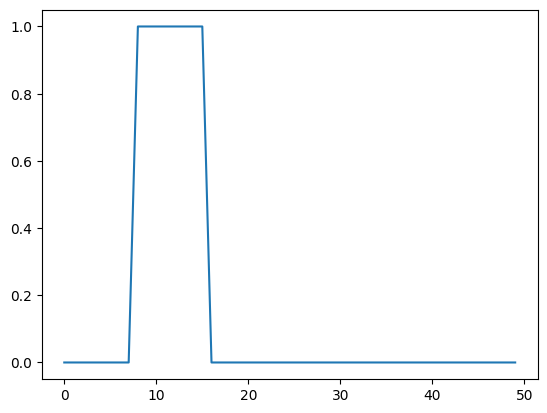

In [7]:
ones = np.array([1, 1, 1, 1])
F = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
goal_pos = np.array([160,0])
l=50

reached=[]
for i in range(len(xdata)):
    current_pos=np.array([xdata[i],ydata[i]])
    if all(F @ (current_pos - goal_pos) <= l * ones):
        reached.append(True)
    else:
        reached.append(False)

plt.plot(reached)

##### Calcul vitesse

In [8]:
Vleftdata = np.array(Vleftdata)
Vrightdata = np.array(Vrightdata)

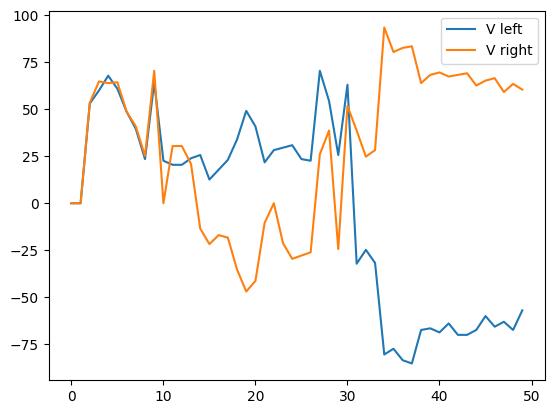

In [9]:
plt.plot(Vleftdata, label="V left")
plt.plot(Vrightdata, label="V right")
plt.legend()

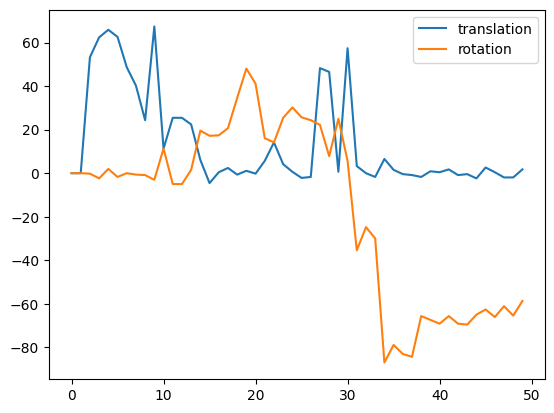

In [10]:
plt.plot((Vleftdata+Vrightdata)/2, label = "translation")
plt.plot((Vleftdata-Vrightdata)/2, label = "rotation")
plt.legend()

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.76703055e-03
 -1.37428549e-03  1.02425958e-02 -3.77455454e-02 -7.05968724e-01
 -7.27423733e-01 -1.10730483e+00 -2.67811078e-01 -8.64976291e-01
 -6.66833907e-01 -6.45113902e-01 -6.95277340e-01 -1.18215527e+00
 -1.54995399e+00 -1.33631596e+00 -1.22596662e+00 -1.17153033e+00
 -9.75967790e-01 -9.96623471e-01 -9.68990114e-01 -6.99677519e-01
 -8.10318203e-01 -6.56091451e-01 -8.56364568e-01 -7.46681234e-01
  1.58331198e+00  8.66469575e-01  9.56947611e-01  3.95797908e+00
  2.55932453e+00  2.77245704e+00  2.75400741e+00  2.14145467e+00
  2.24768300e+00  2.21559842e+00  2.17584643e+00  2.30714258e+00
  2.19445483e+00  2.15691831e+00  2.11373092e+00  2.10481575e+00
  2.04471450e+00  2.07623417e+00  1.91967756e+00  1.86827788e+00
  1.77593572e+00  1.61307537e+00]
[ 0.          0.         -0.00465008 -0.0511509   0.04185073 -0.03720065
  0.         -0.01395024 -0.01860033 -0.06510114  0.24180423 -0.10695187
 -0.10695187  0.03255057  0.41850732  0.

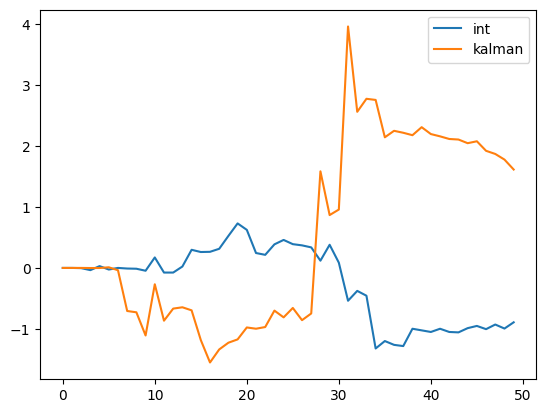

In [11]:
L = 46.75
theta_dot = (Vleftdata-Vrightdata)/2/L

print(np.array(thetadata))
print(theta_dot)

Ts = 0.71
theta_int=[0]

theta_int=[theta_int[-1] + Ts*theta_dot[i] for i in range(len(theta_dot))]

print(theta_int)

plt.plot(theta_int, label='int')
plt.plot(thetadata, label='kalman')
plt.legend()

[0, 0.0, 0.0, 37.815217391304344, 82.11304347826086, 128.8804347826087, 173.33260869565217, 207.90652173913043, 236.4608695652174, 253.74782608695654, 301.59565217391304, 309.6217391304348, 327.6804347826087, 345.7391304347826, 361.63695652173914, 365.9586956521739, 362.7173913043478, 363.02608695652174, 364.72391304347826, 364.2608695652174, 365.0326086956522, 364.8782608695652, 368.8913043478261, 378.9239130434783, 381.85652173913047, 382.31956521739136, 380.7760869565218, 379.54130434782616, 413.8065217391305, 446.83695652173924, 447.3000000000001, 488.04782608695666, 490.36304347826103, 490.36304347826103, 489.1282608695654, 493.7586956521741, 494.83913043478276, 494.53043478260884, 493.913043478261, 492.67826086956535, 493.2956521739132, 493.6043478260871, 494.83913043478276, 494.2217391304349, 493.913043478261, 492.21521739130446, 494.06739130434795, 494.3760869565219, 492.9869565217393, 491.5978260869567]


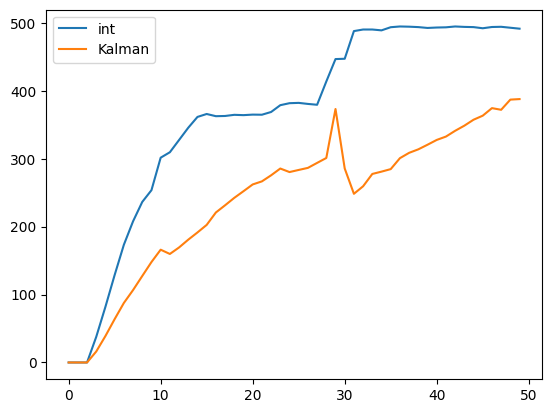

In [12]:
V = (Vrightdata + Vleftdata)/2
Distance = [0]

for i in range(len(V)-1):
    Distance.append(Distance[-1] + Ts*V[i])

print(Distance)
plt.plot(Distance, label="int")
plt.plot(xdata, label="Kalman")
plt.legend()

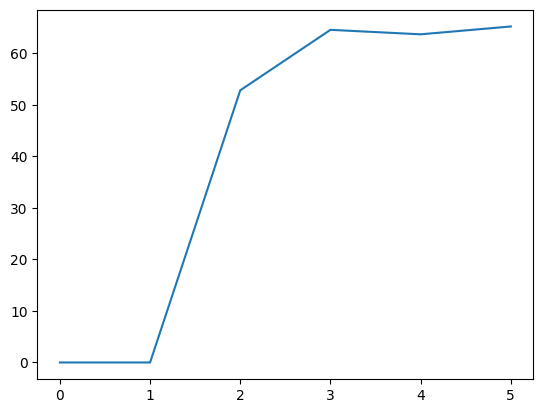

In [15]:
plt.plot(V)

In [16]:
x_traveled = 285 # mm

Ts_2=x_traveled/np.sum(V[:-1])

print(f'Deuxième estimation de Ts = {Ts_2}')

Deuxième estimation de Ts = 1.5738295318127251


[0, 0.0, 0.0, 83.1392557022809, 184.75390156062423, 285.0]


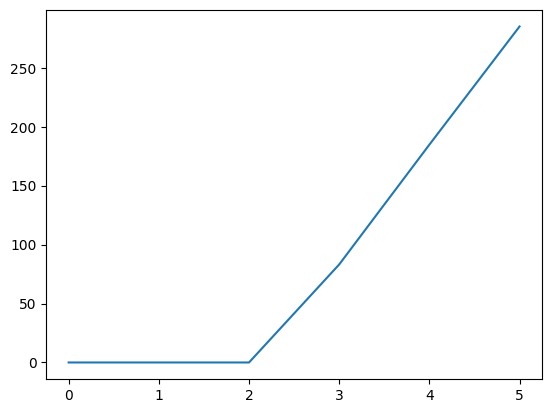

In [17]:
Distance_2 = [0]

for i in range(len(V)-1):
    Distance_2.append(Distance_2[-1] + Ts_2*V[i])

print(Distance_2)
plt.plot(Distance_2)

In [18]:
Vleftdata_2 = np.zeros(4)
Vrightdata_2 = np.zeros(4)

Vleftdata_2[1:] = Vleftdata[:-1]
Vrightdata_2[1:] = Vrightdata[:-1]

print(Vleftdata_2)
print(Vrightdata_2)

V_2 = (Vleftdata_2 + Vrightdata_2)/2

print(V_2)

Distance_3 = [0]

for i in range(len(V_2)-1):
    Distance_3.append(Distance_3[-1] + Ts_3*V_2[i])

print(Distance_3)
print(xdata)
print(len(Distance_3))
print(len(xdata))
plt.plot(Distance_3, label="int")
plt.plot(xdata, label ="Kalman")
plt.legend()

ValueError: could not broadcast input array from shape (5,) into shape (3,)

In [ ]:
Ts_3 = x_traveled/np.sum(V_2[:-1])
print(Ts_3)

1.0943238731218699


#### Trying to rebuild the kalman filter

In [ ]:
print(xdata)
print(ydata)
print(thetadata)
print(Vleftdata)
print(Vrightdata)

[0, 0.0, 49.46847826086957, 135.04385176710394]
[0, 0.0, 0.0, -1.251344651013118]
[0, 0.0, -0.023100334926148457, 0.8055473224958153]
[119.56521739 137.82608696 135.2173913  136.95652174]
[122.60869565 140.86956522 133.91304348  79.56521739]


In [ ]:
z_0 = np.zeros(6)
L = 46.75  # mm - demi-distance entre les 2 roues
Ts = 0.71
W = np.diag([0.001, 0.001, 0.00001, 0.001, 0.001, 0.00001])
V_nc = np.diag([0.001, 0.00001])
A = np.array(
    [
        [1, 0, 0, Ts, 0, 0],
        [0, 1, 0, 0, Ts, 0],
        [0, 0, 1, 0, 0, Ts],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
    ]
)

In [ ]:
def g_nc(z):
    theta = z[2]
    s_nc = [
        z[3] * np.cos(theta)
        + z[4] * np.sin(theta),  # x_dot*cos(theta) + y_dot*sin(theta)
        L * z[5],
    ]  # L*theta_dot
    return np.array(s_nc)


def grad_g_nc(z):
    theta = z[2]
    x_dot, y_dot = z[3], z[4]
    grad = [
        [
            0,
            0,
            -x_dot * np.sin(theta) + y_dot * np.cos(theta),
            np.cos(theta),
            np.sin(theta),
            0,
        ],
        [0, 0, 0, 0, 0, L],
    ]
    return np.array(grad)

def constructing_s(V_left_measure,V_right_measure):
    s_nc = np.array(
        [(V_left_measure + V_right_measure) / 2,
        (V_left_measure - V_right_measure) / 2])
    return s_nc


def filtering_step(
        z_k_k_1,
        sigma_k_k_1,
        V_left_measure,
        V_right_measure,
    ):
        ### Computing the variables that are dependant on the state of the camera
        C_k = grad_g_nc(z_k_k_1)
        V = V_nc
        s_k = constructing_s(V_left_measure,V_right_measure)
        g_k = g_nc(z_k_k_1)

        ### The real filtering step that can be rewritten without any problem
        L_k_k = sigma_k_k_1 @ C_k.T @ np.linalg.inv(C_k @ sigma_k_k_1 @ C_k.T + V)
        sigma_k_k = sigma_k_k_1 - L_k_k @ C_k @ sigma_k_k_1
        z_k_k = z_k_k_1 + L_k_k @ (s_k - g_k)

        return z_k_k, sigma_k_k

def prediction_step(z_k_k, sigma_k_k):
    z_k_1_k = A @ z_k_k
    sigma_k_1_k = A @ sigma_k_k @ A.T + W
    return z_k_1_k, sigma_k_1_k

